# Preparing Data
Your Model is Only as Good as the Training Data

## Data Usually Contains Bugs/Outliers

You will likely spend most of your time in machine learning messing around with the data.


In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# let's pretend we have captured a set of data that tells 
# how many unique User Agents we found associated with IP addresses
df = pd.DataFrame([[1,2],[3,6],[5,10],[6,12],[7,14],[32,1],[8,16]])
df.columns = ['Unique User Agents','Unique IPs']
df

,Unique User Agents,Unique IPs
0,1,2
1,3,6
2,5,10
3,6,12
4,7,14
5,32,1
6,8,16


You can see above that there is an outlier in the data--a point that doesn't fit the pattern of the other data points and may be a case we don't want to support in our model.

<IPython.core.display.Javascript object>


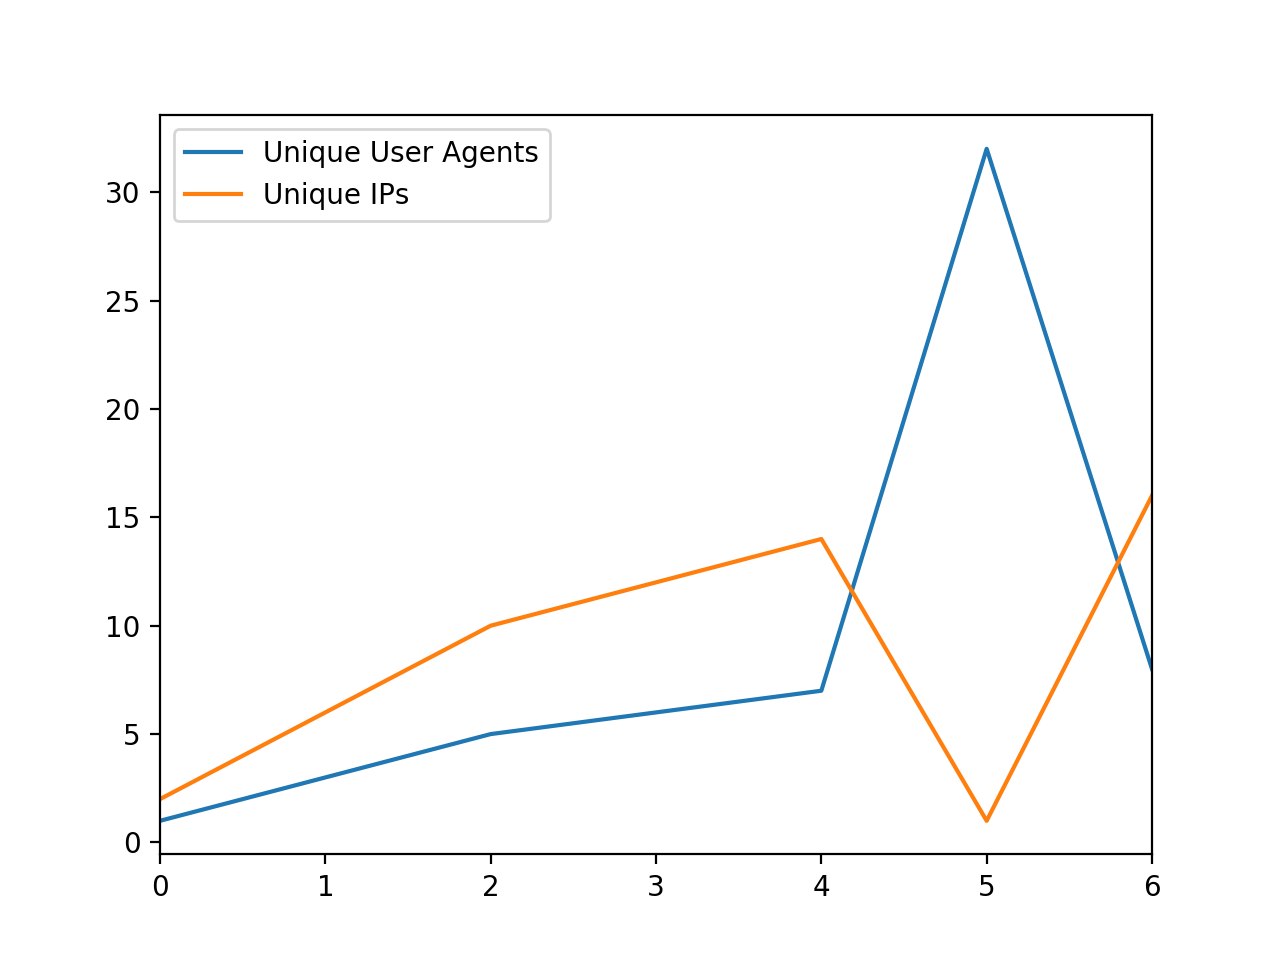

In [7]:
df.plot();

The outlier might be a college campus, with thousands of users (and probably a lot of junk traffic with user-agent spoofing), but only 1 outbound IP address. This is an example of an outlier that will fool your model into thinking that this is a normal event that has the same wieght as everything else. Before running ML on your data, find the outliers and decide at what point you want to cut off and restrict the anomalies to create a "normalized" set of data.
You may want to build a special model to analyse extremely different groupings of the data.

<IPython.core.display.Javascript object>


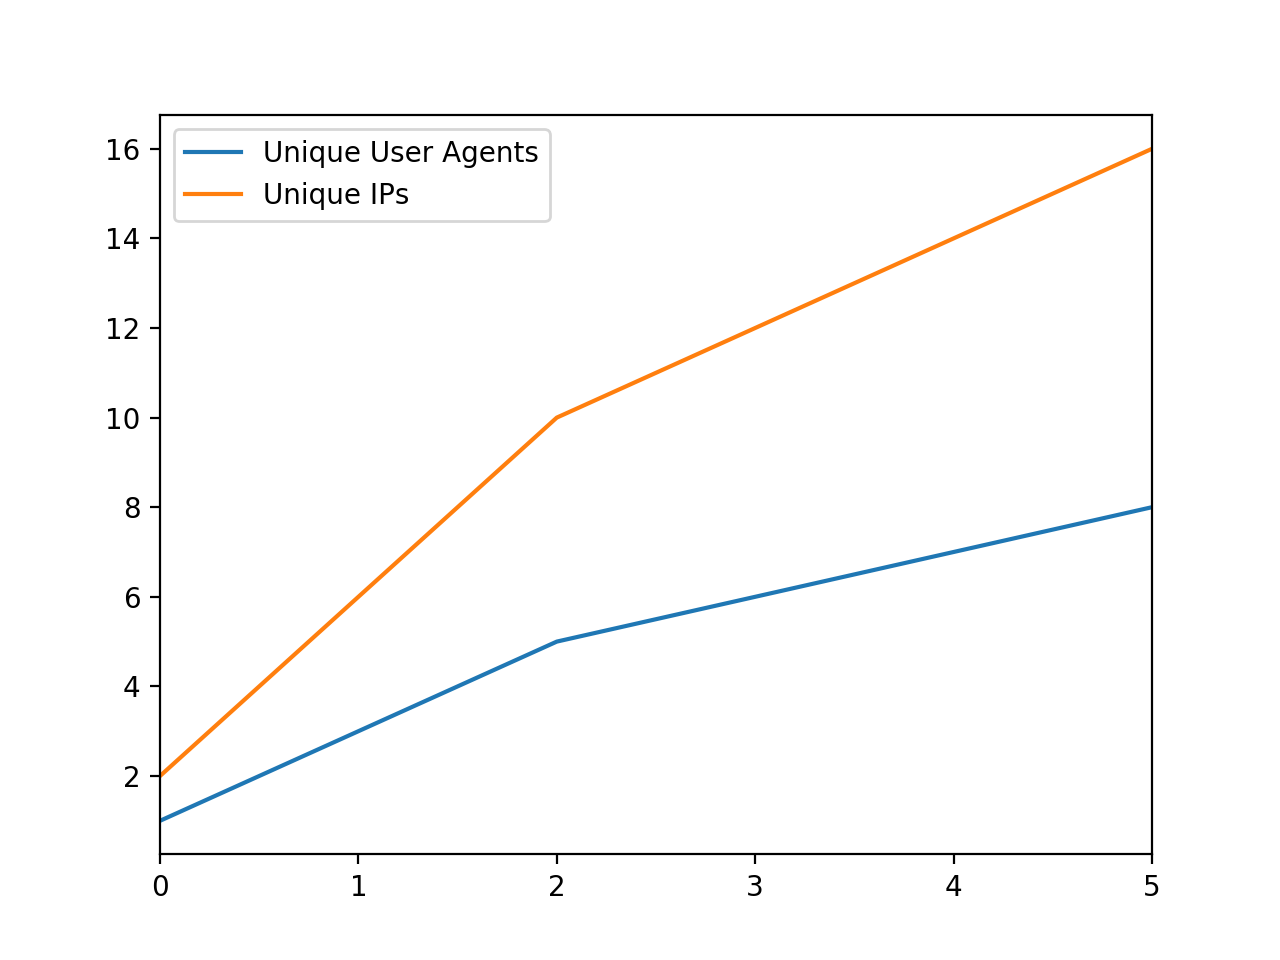

In [8]:
# Let's see what it looks like if we exclude the anomaly
df = pd.DataFrame([[1,2],[3,6],[5,10],[6,12],[7,14],[8,16]]);
df.columns = ['Unique User Agents','Unique IPs'];
df.plot();

# Splitting the Data into Train and Test Sets
You will need to segment your data into a training set (for teaching the model) and a test/eval set for evaluating the model. Both of these datasets need to have all of the truth data you are trying to predict.
Make sure to hold out some of your truth data for evaluation.
> evaluations using the same data as the training data will not give an accurate report of the efficacy of your model (you may be over or under fitting the data but the eval step will fail to give a bad score)

Some libraries like scikit-learn have utilities for helping to split and manage your data.
In the next example, we'll use [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split our data.

## Next Up

[Regression Examples](/notebooks/06 - Regression Examples.ipynb)